In [2]:
#setup
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

print("Setup Complete")

Setup Complete


In [5]:

import pandas as pd
import io
from google.colab import files
uploaded = files.upload()


Saving country_vaccinations.csv to country_vaccinations (1).csv


In [6]:
 #loading the data
country_vaccinations = pd.read_csv(io.BytesIO(uploaded['country_vaccinations.csv']))
print(country_vaccinations)

           country  ...                                     source_website
0      Afghanistan  ...                           https://covid19.who.int/
1      Afghanistan  ...                           https://covid19.who.int/
2      Afghanistan  ...                           https://covid19.who.int/
3      Afghanistan  ...                           https://covid19.who.int/
4      Afghanistan  ...                           https://covid19.who.int/
...            ...  ...                                                ...
33720     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1419767795...
33721     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1419767795...
33722     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1419767795...
33723     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1419767795...
33724     Zimbabwe  ...  https://twitter.com/MoHCCZim/status/1419767795...

[33725 rows x 15 columns]


In [7]:
# Print the first 5 rows of the data
country_vaccinations.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [8]:
#data preprocessing and cleaning
country_vaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33725 entries, 0 to 33724
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              33725 non-null  object 
 1   iso_code                             33725 non-null  object 
 2   date                                 33725 non-null  object 
 3   total_vaccinations                   18746 non-null  float64
 4   people_vaccinated                    17879 non-null  float64
 5   people_fully_vaccinated              15058 non-null  float64
 6   daily_vaccinations_raw               15449 non-null  float64
 7   daily_vaccinations                   33464 non-null  float64
 8   total_vaccinations_per_hundred       18746 non-null  float64
 9   people_vaccinated_per_hundred        17879 non-null  float64
 10  people_fully_vaccinated_per_hundred  15058 non-null  float64
 11  daily_vaccinations_per_milli

In [9]:
country_vaccinations.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [10]:
country_vaccinations.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.874600e+04,1.787900e+04,1.505800e+04,1.544900e+04,3.346400e+04,18746.000000,17879.000000,15058.000000,33464.000000
mean,1.351367e+07,6.211962e+06,3.635993e+06,2.359468e+05,1.179531e+05,31.963971,20.481091,13.646440,3494.270171
std,7.562393e+07,2.277708e+07,1.312727e+07,1.277516e+06,8.497067e+05,37.038693,21.510236,16.999178,4575.530654
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.384602e+05,1.116510e+05,5.237050e+04,4.544000e+03,8.320000e+02,3.350000,2.760000,1.470000,425.000000
50%,9.848220e+05,7.061580e+05,4.022775e+05,2.226400e+04,6.444000e+03,16.595000,11.780000,6.310000,1974.000000
75%,4.775988e+06,3.162285e+06,1.876900e+06,9.946200e+04,3.663500e+04,49.627500,33.915000,20.047500,5242.250000
max,1.583361e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.720000,116.730000,115.990000,118759.000000


In [11]:
#Detect missing values
country_vaccinations.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     14979
people_vaccinated                      15846
people_fully_vaccinated                18667
daily_vaccinations_raw                 18276
daily_vaccinations                       261
total_vaccinations_per_hundred         14979
people_vaccinated_per_hundred          15846
people_fully_vaccinated_per_hundred    18667
daily_vaccinations_per_million           261
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [12]:
#Data spiltting
country_vaccinations.fillna(value=0, inplace=True)
date = country_vaccinations.date.str.split('-', expand=True)
date

,0,1,2
0,2021,02,22
1,2021,02,23
2,2021,02,24
3,2021,02,25
4,2021,02,26
...,...,...,...
33720,2021,07,22
33721,2021,07,23
33722,2021,07,24
33723,2021,07,25


In [13]:

country_vaccinations['year'] = date[0]
country_vaccinations['month'] = date[1]
country_vaccinations['day'] = date[2]

country_vaccinations.year = pd.to_numeric(country_vaccinations.year)
country_vaccinations.month = pd.to_numeric(country_vaccinations.month)
country_vaccinations.day = pd.to_numeric(country_vaccinations.day)

country_vaccinations.date = pd.to_datetime(country_vaccinations.date)

country_vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.0,0.0,0.0,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26


In [14]:
country_vaccinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33725 entries, 0 to 33724
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              33725 non-null  object        
 1   iso_code                             33725 non-null  object        
 2   date                                 33725 non-null  datetime64[ns]
 3   total_vaccinations                   33725 non-null  float64       
 4   people_vaccinated                    33725 non-null  float64       
 5   people_fully_vaccinated              33725 non-null  float64       
 6   daily_vaccinations_raw               33725 non-null  float64       
 7   daily_vaccinations                   33725 non-null  float64       
 8   total_vaccinations_per_hundred       33725 non-null  float64       
 9   people_vaccinated_per_hundred        33725 non-null  float64       
 10  people_ful

In [57]:
#visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (10, 6)


In [16]:
#explore mean, min, max
country_vaccinations.mean()

total_vaccinations                     7.511557e+06
people_vaccinated                      3.293215e+06
people_fully_vaccinated                1.623448e+06
daily_vaccinations_raw                 1.080843e+05
daily_vaccinations                     1.170402e+05
total_vaccinations_per_hundred         1.776713e+01
people_vaccinated_per_hundred          1.085786e+01
people_fully_vaccinated_per_hundred    6.093049e+00
daily_vaccinations_per_million         3.467228e+03
year                                   2.020987e+03
month                                  4.602461e+00
day                                    1.571502e+01
dtype: float64

In [17]:
country_vaccinations.min()

country                                                                      Afghanistan
iso_code                                                                             ABW
date                                                                 2020-12-02 00:00:00
total_vaccinations                                                                     0
people_vaccinated                                                                      0
people_fully_vaccinated                                                                0
daily_vaccinations_raw                                                                 0
daily_vaccinations                                                                     0
total_vaccinations_per_hundred                                                         0
people_vaccinated_per_hundred                                                          0
people_fully_vaccinated_per_hundred                                                    0
daily_vaccinations_pe

In [18]:
country_vaccinations.max()

country                                                                         Zimbabwe
iso_code                                                                             ZWE
date                                                                 2021-07-27 00:00:00
total_vaccinations                                                           1.58336e+09
people_vaccinated                                                               6.22e+08
people_fully_vaccinated                                                      2.23299e+08
daily_vaccinations_raw                                                        2.4741e+07
daily_vaccinations                                                           2.24243e+07
total_vaccinations_per_hundred                                                    232.72
people_vaccinated_per_hundred                                                     116.73
people_fully_vaccinated_per_hundred                                               115.99
daily_vaccinations_pe

In [19]:
#explore country column
country_vaccinations.country.value_counts()

Norway                             237
Latvia                             236
Scotland                           231
England                            231
United Kingdom                     226
                                  ... 
Algeria                             22
Niue                                16
Haiti                               11
Bonaire Sint Eustatius and Saba      1
Turkmenistan                         1
Name: country, Length: 219, dtype: int64

In [20]:
country_vaccinations.country

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
33720       Zimbabwe
33721       Zimbabwe
33722       Zimbabwe
33723       Zimbabwe
33724       Zimbabwe
Name: country, Length: 33725, dtype: object

In [21]:
country_vaccinations.people_fully_vaccinated.max()

223299000.0

In [22]:
country_vaccinations.date.min()

Timestamp('2020-12-02 00:00:00')

In [23]:
country_vaccinations.date.max()

Timestamp('2021-07-27 00:00:00')

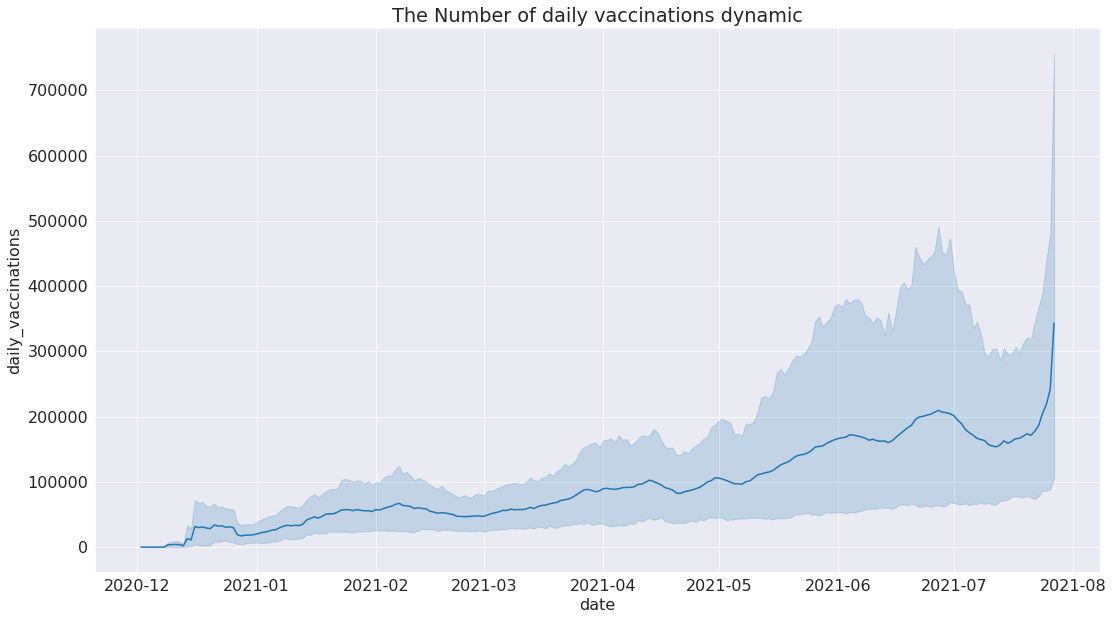

In [58]:
#visualization
plt.figure(figsize=(18,10))
sns.lineplot(x=country_vaccinations.date, y=country_vaccinations.daily_vaccinations)
plt.title('The Number of daily vaccinations dynamic')
plt.show()

In [25]:
#explore the vaccination rate
countries = country_vaccinations.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= country_vaccinations.columns)
for country in countries:
  top_countries = top_countries.append(country_vaccinations.loc[country_vaccinations['country'] == country])

Text(0.5, 1.0, 'Vaccination procedure go on rapidly')

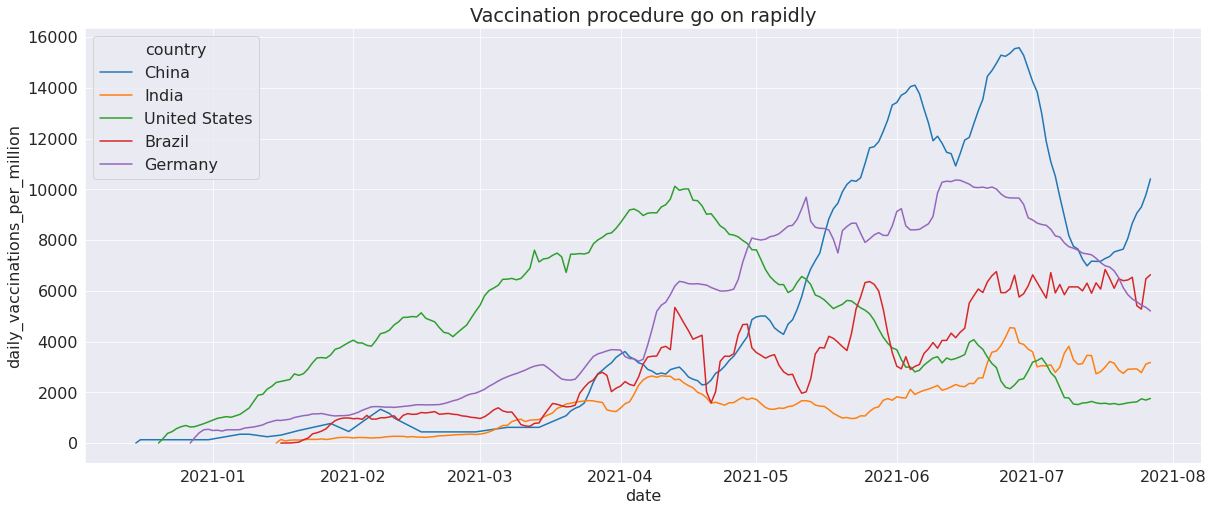

In [59]:
plt.figure(figsize=(20,8))
sns.lineplot(top_countries['date'], 
             top_countries['daily_vaccinations_per_million'], 
             hue= top_countries['country'], ci= False)
plt.title('Vaccination procedure go on rapidly')

In [27]:
fully_vaccinated = country_vaccinations.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending= False).head(25)

In [28]:
fully_vaccinated.reset_index()

,country,people_fully_vaccinated
0,China,223299000.0
1,United States,163312474.0
2,India,96832598.0
3,Germany,41790697.0
4,Brazil,38880731.0
5,United Kingdom,37459060.0
6,Japan,33428900.0
7,England,31320313.0
8,France,30578272.0
9,Italy,30094367.0


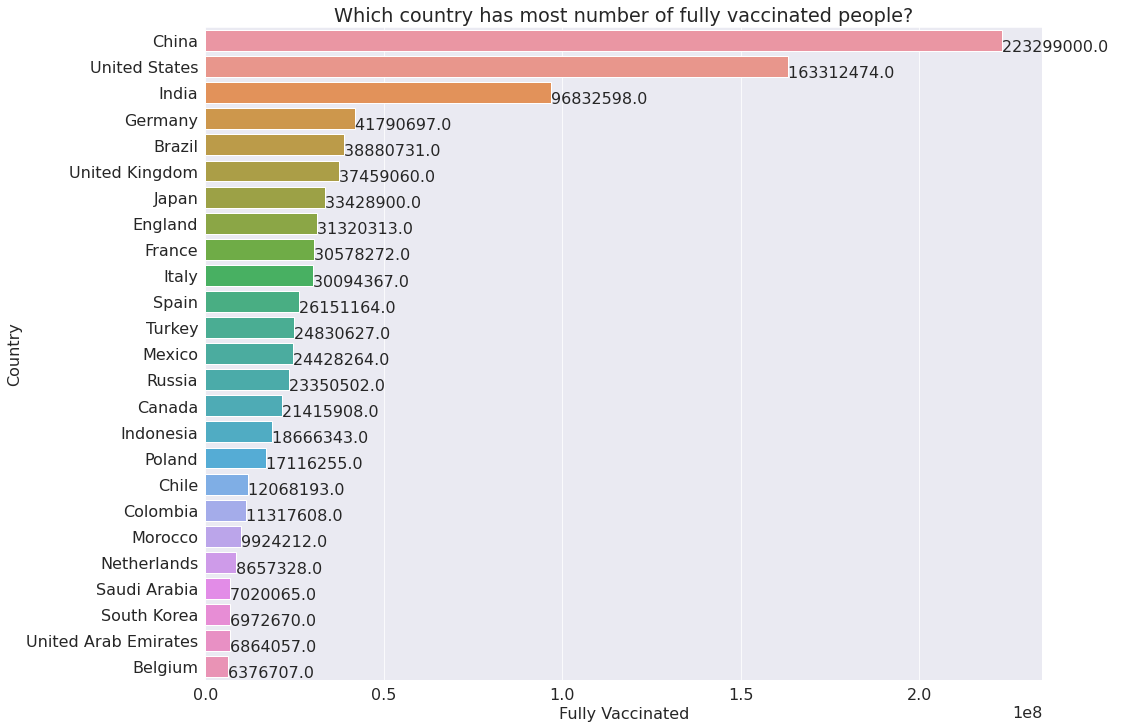

In [61]:
plt.figure(figsize=(15,12))
ax = sns.barplot(x=fully_vaccinated, y=fully_vaccinated.index)
plt.xlabel("Fully Vaccinated")
plt.ylabel("Country");
plt.title('Which country has most number of fully vaccinated people?');

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} '.format(width))

In [30]:
daily_vaccinations_per_million = country_vaccinations.groupby("country")["daily_vaccinations_per_million"].max().sort_values(ascending= False).head(15)

In [31]:
daily_vaccinations_per_million.reset_index()

,country,daily_vaccinations_per_million
0,Bhutan,118759.0
1,Falkland Islands,54264.0
2,Niue,53770.0
3,Nauru,51689.0
4,Cook Islands,46231.0
5,Mongolia,38271.0
6,Gibraltar,31700.0
7,Wallis and Futuna,30500.0
8,Saint Helena,27178.0
9,Aruba,25092.0


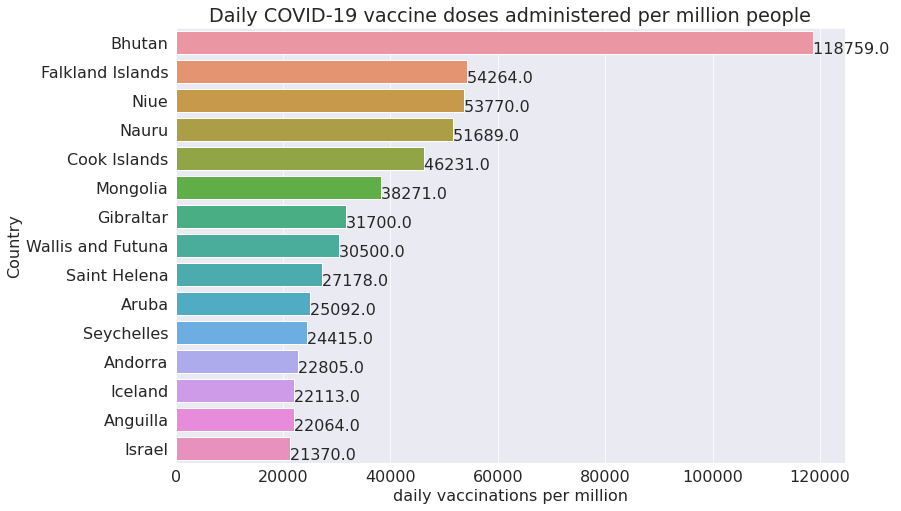

In [62]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=daily_vaccinations_per_million, y=daily_vaccinations_per_million.index )
plt.xlabel("daily vaccinations per million")
plt.ylabel("Country")
plt.title("Daily COVID-19 vaccine doses administered per million people");

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:.1f} '.format(width))

In [33]:
#number of people daily vaccinated in India
india_df = country_vaccinations[country_vaccinations['country'] == 'India']
india_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
13684,India,IND,2021-01-15,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,1,15
13685,India,IND,2021-01-16,191181.0,191181.0,0.0,191181.0,191181.0,0.01,0.01,0.00,139.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,1,16
13686,India,IND,2021-01-17,224301.0,224301.0,0.0,33120.0,112150.0,0.02,0.02,0.00,81.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,1,17
13687,India,IND,2021-01-18,454049.0,454049.0,0.0,229748.0,151350.0,0.03,0.03,0.00,110.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,1,18
13688,India,IND,2021-01-19,674835.0,674835.0,0.0,220786.0,168709.0,0.05,0.05,0.00,122.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13873,India,IND,2021-07-23,427882261.0,336819816.0,91062445.0,4465231.0,4026626.0,31.01,24.41,6.60,2918.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,7,23
13874,India,IND,2021-07-24,433150864.0,340387695.0,92763169.0,5268603.0,4031307.0,31.39,24.67,6.72,2921.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,7,24
13875,India,IND,2021-07-25,435196001.0,341802707.0,93393294.0,2045137.0,3829563.0,31.54,24.77,6.77,2775.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,7,25
13876,India,IND,2021-07-26,441912395.0,346516149.0,95396246.0,6716394.0,4295142.0,32.02,25.11,6.91,3112.0,"Covaxin, Oxford/AstraZeneca, Sputnik V",Government of India,https://www.mohfw.gov.in/,2021,7,26


In [34]:
india_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 13684 to 13877
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              194 non-null    object        
 1   iso_code                             194 non-null    object        
 2   date                                 194 non-null    datetime64[ns]
 3   total_vaccinations                   194 non-null    float64       
 4   people_vaccinated                    194 non-null    float64       
 5   people_fully_vaccinated              194 non-null    float64       
 6   daily_vaccinations_raw               194 non-null    float64       
 7   daily_vaccinations                   194 non-null    float64       
 8   total_vaccinations_per_hundred       194 non-null    float64       
 9   people_vaccinated_per_hundred        194 non-null    float64       
 10  people_f

In [35]:
india_df.daily_vaccinations_raw.sum()

419833123.0

Text(0.5, 1.0, 'How many people daily vaccinated in India?')

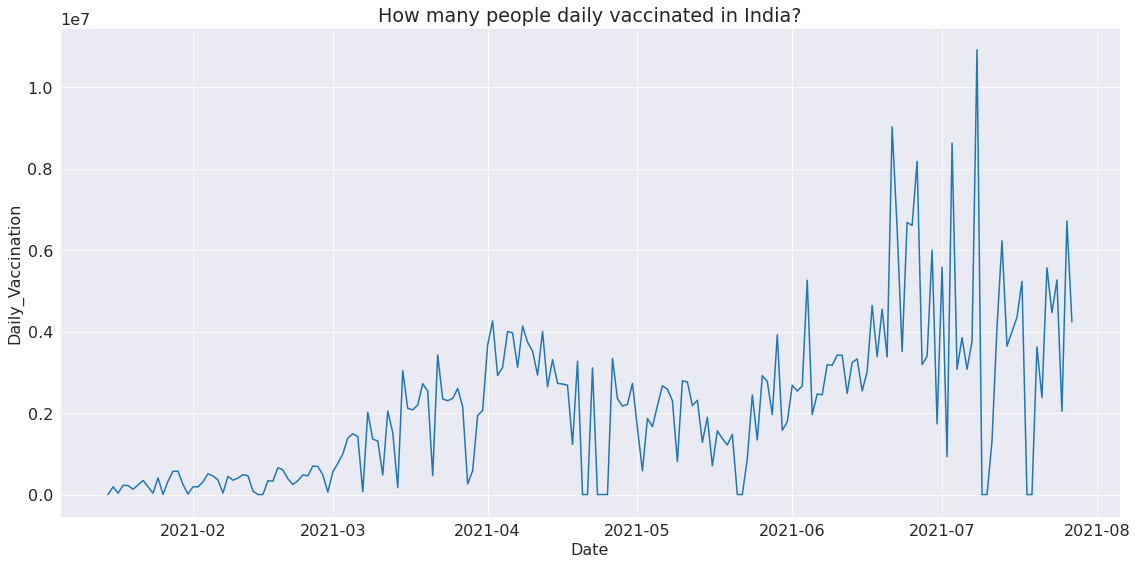

In [64]:
plt.figure(figsize=(19,9))
sns.lineplot(x=india_df.date, y=india_df.daily_vaccinations_raw)
plt.xlabel("Date")
plt.ylabel("Daily_Vaccination")
plt.title('How many people daily vaccinated in India?')

In [37]:
#people fully vaccinated in India
fully_vaccinated_india = india_df.people_fully_vaccinated.max()/1000000

In [38]:
print("Total fully vaccinated people in India: {0:.2f}M".format(fully_vaccinated_india))

Total fully vaccinated people in India: 96.83M


In [39]:
#country which fully vaccinated most of the people
population_country=country_vaccinations.groupby('country')['total_vaccinations_per_hundred'].max().sort_values(ascending=False).head(15)

In [40]:
population_country.reset_index()

,country,total_vaccinations_per_hundred
0,Gibraltar,232.72
1,Malta,169.15
2,United Arab Emirates,167.71
3,Pitcairn,163.83
4,Cayman Islands,147.59
5,Isle of Man,144.13
6,Seychelles,143.82
7,Iceland,137.26
8,Guernsey,136.79
9,Nauru,136.46


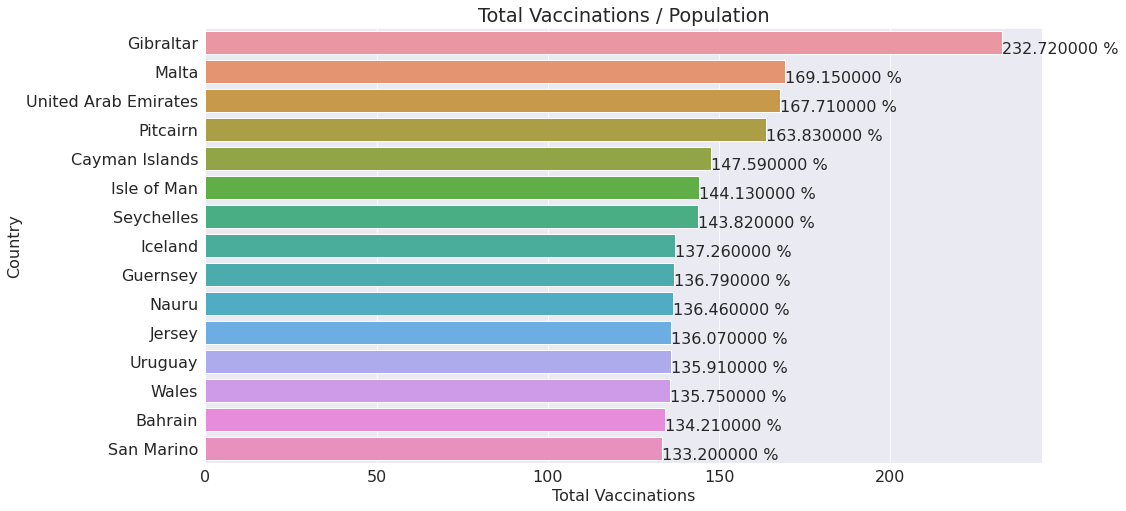

In [65]:
plt.figure(figsize= (15, 8))
ax = sns.barplot(x=population_country, y=population_country.index)
plt.title('Total Vaccinations / Population')
plt.xlabel('Total Vaccinations')
plt.ylabel('Country')

for patch in ax.patches:
    width = patch.get_width()
    height = patch.get_height()
    x = patch.get_x()
    y = patch.get_y()
    
    plt.text(width + x, height + y, '{:1f} %'.format(width))